In [4]:
# USAGE
# python train_mask_detector.py --dataset dataset

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import glob
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
from PIL import Image

In [2]:
# construct the argument parser and parse the arguments
args = {'dataset':'../data/satellite/oilpalm/'}

In [3]:
def _load_oilpalm(prefix="train", img_size=96):
    tokens = prefix.split('+')
    img_list = []
    for pf in tokens:
        img_list.extend(glob.glob(args['dataset'] + pf + '/**/*'))
#     img_list = glob.glob('../data/satellite/oilpalm/' + prefix + '/**/*')
    np.random.shuffle(img_list)
    X_train = []
    for f in img_list:
        img = Image.open(f).resize((img_size, img_size))
        X_train.append(img)
    X_train = np.stack(X_train).astype("float32")
    y_train = np.array([f.split('/')[-2] for f in img_list])
    
    print("{} images".format(prefix))
    print(X_train.shape, X_train.dtype)
    print(y_train.shape)
    return X_train, y_train

In [4]:
# load facemask train data
trainX, trainY = _load_oilpalm("train")#+unlabeled")

train images
(187, 96, 96, 3) float32
(187,)


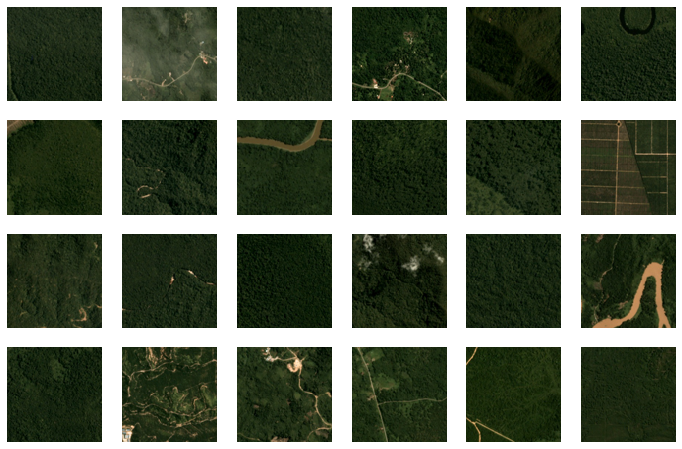

In [5]:
idx = np.where(trainY == 'nopalm')[0][:24]
fig, axs = plt.subplots(nrows=4, ncols=6, constrained_layout=False, figsize=(12,8))

for (i, ax), j in zip(enumerate(axs.flat), idx):
    ax.imshow(trainX[j] / 255.)
    ax.axis('off')
#     ax.title.set_text(trainY[j])
# plt.show()
plt.savefig('nopalm.png')

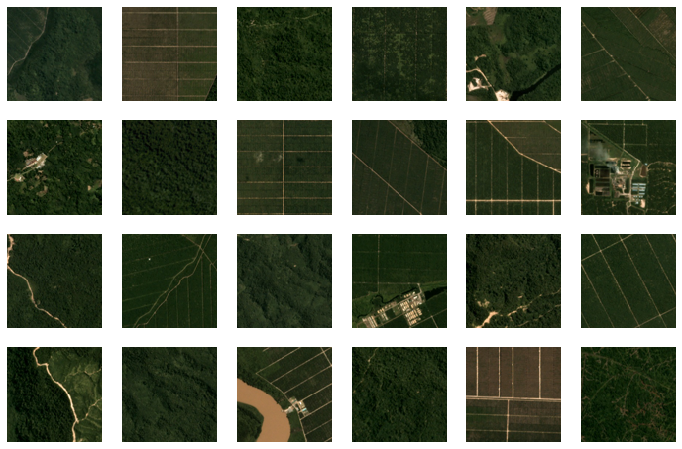

In [6]:
idx = np.where(trainY == 'palm')[0][:24]
fig, axs = plt.subplots(nrows=4, ncols=6, constrained_layout=False, figsize=(12,8))

for (i, ax), j in zip(enumerate(axs.flat), idx):
    ax.imshow(trainX[j] / 255.)
    ax.axis('off')
#     ax.title.set_text(trainY[j])
# plt.show()
plt.savefig('palm.png')

In [7]:
def _load_facemask(prefix="train", img_size=96):
    img_list = glob.glob('../data/facemask/' + prefix + '/**/*')
    np.random.shuffle(img_list)
    X_train = []
    for f in img_list:
        img = Image.open(f).resize((img_size, img_size))
        X_train.append(img)
    X_train = np.stack(X_train).transpose(0,3,1,2)
    y_train = np.array([f.split('/')[-2] == 'with_mask' for f in img_list])
    
    print("{} images".format(prefix))
    print(X_train.shape)
    print(y_train.shape)
    return X_train, y_train

In [8]:
# load facemask train data
X_train, y_train = _load_facemask("train")

train images
(191, 3, 96, 96)
(191,)


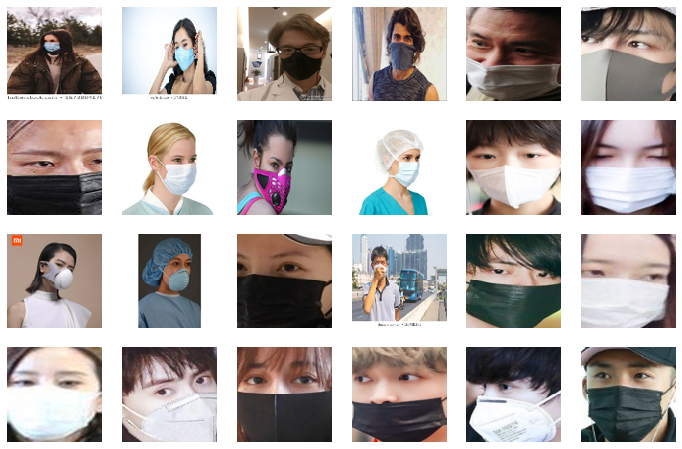

In [9]:
idx = np.where(y_train)[0][1:25]
fig, axs = plt.subplots(nrows=4, ncols=6, constrained_layout=False, figsize=(12,8))

for (i, ax), j in zip(enumerate(axs.flat), idx):
    ax.imshow(X_train[j].transpose(1,2,0))
#     ax.title.set_text(y_train[j])
    ax.axis('off')
# plt.show()
plt.savefig('with_mask.png')

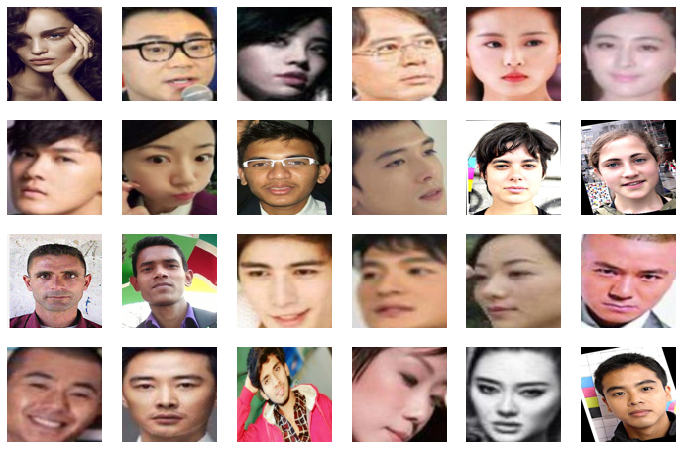

In [10]:
idx = np.where(~y_train)[0][:24]
fig, axs = plt.subplots(nrows=4, ncols=6, constrained_layout=False, figsize=(12,8))

for (i, ax), j in zip(enumerate(axs.flat), idx):
    ax.imshow(X_train[j].transpose(1,2,0))
#     ax.title.set_text(y_train[j])
    ax.axis('off')
# plt.show()
plt.savefig('without_mask.png')

In [1]:
# construct the argument parser and parse the arguments
args = {'dataset':'../data/satellite/amazon/'}

In [7]:
def _load_amazon(prefix="train", img_size=256):
    tokens = prefix.split('+')
    img_list = []
    for pf in tokens:
        img_list.extend(glob.glob(args['dataset'] + pf + '/**/*'))
#     img_list = glob.glob('../data/satellite/oilpalm/' + prefix + '/**/*')
    np.random.shuffle(img_list)
    X_train = []
    for f in img_list:
        img = Image.open(f).convert('RGB').resize((img_size, img_size))
        X_train.append(img)
    X_train = np.stack(X_train).astype("float32")
    y_train = np.array([f.split('/')[-2] for f in img_list])
    
    print("{} images".format(prefix))
    print(X_train.shape, X_train.dtype)
    print(y_train.shape)
    return X_train, y_train

In [8]:
# load facemask train data
trainX, trainY = _load_amazon("train")#+unlabeled")

train images
(2111, 256, 256, 3) float32
(2111,)


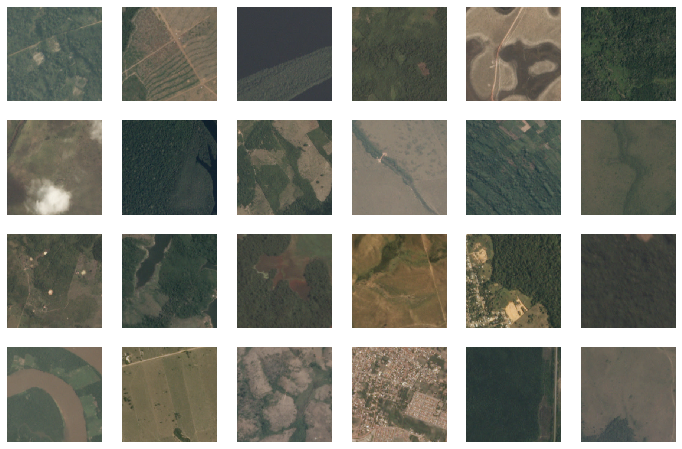

In [9]:
idx = np.where(trainY == 'agri')[0][:24]
fig, axs = plt.subplots(nrows=4, ncols=6, constrained_layout=False, figsize=(12,8))

for (i, ax), j in zip(enumerate(axs.flat), idx):
    ax.imshow(trainX[j] / 255.)
    ax.axis('off')
#     ax.title.set_text(trainY[j])
# plt.show()
plt.savefig('agri.png')

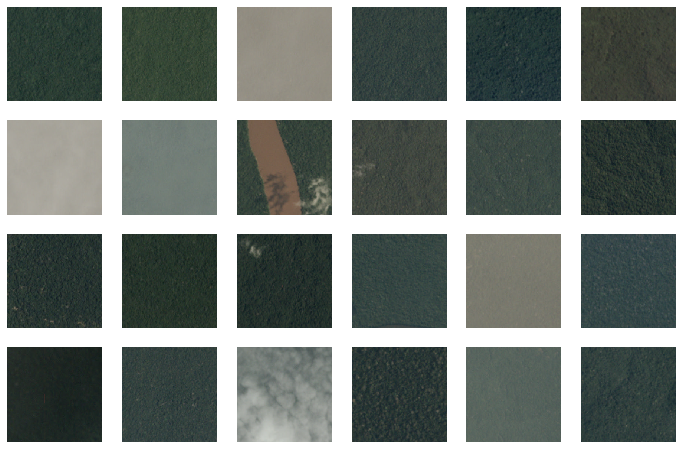

In [10]:
idx = np.where(trainY == 'noagri')[0][:24]
fig, axs = plt.subplots(nrows=4, ncols=6, constrained_layout=False, figsize=(12,8))

for (i, ax), j in zip(enumerate(axs.flat), idx):
    ax.imshow(trainX[j] / 255.)
    ax.axis('off')
#     ax.title.set_text(trainY[j])
# plt.show()
plt.savefig('noagri.png')